In [10]:
!pip install pandas-reader
import pandas as pd

ERROR: Could not find a version that satisfies the requirement pandas-reader (from versions: none)
ERROR: No matching distribution found for pandas-reader
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [11]:
from pandas_datareader import data
from pandas_profiling import ProfileReport

In [12]:
inf=data.DataReader('INFY',start='2004',end='2019',data_source='yahoo')
inf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-31,3.020937,2.922500,2.937187,2.981250,10630400.0,0.344696
2004-01-02,3.141562,2.992188,3.023750,3.103125,13360000.0,0.358787
2004-01-05,3.203125,3.132812,3.142500,3.165625,12140800.0,0.366014
2004-01-06,3.171875,3.076562,3.130312,3.135937,10416000.0,0.362581
2004-01-07,3.181250,3.048438,3.167187,3.124375,11984000.0,0.361244


In [21]:
inf.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,9.24,9.07,9.19,9.08,8590700.0,8.797617
2018-12-26,9.38,9.12,9.15,9.38,9004200.0,9.088287
2018-12-27,9.45,9.28,9.30,9.45,9856500.0,9.156109
2018-12-28,9.50,9.38,9.48,9.43,6818500.0,9.136732
2018-12-31,9.53,9.39,9.47,9.52,7229400.0,9.223932


In [22]:
inf.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3776.000000,3776.000000,3776.000000,3776.000000,3.776000e+03,3776.000000
mean,6.540309,6.406903,6.474160,6.475555,1.390164e+07,3.602467
std,1.876026,1.870598,1.873381,1.874257,9.496288e+06,2.469044
min,2.321250,2.133437,2.159375,2.264688,1.068400e+06,0.261846
25%,5.120938,5.000000,5.062500,5.039688,8.111500e+06,1.624908
50%,6.718125,6.588125,6.654375,6.658125,1.147190e+07,2.878746
75%,7.930000,7.810000,7.866250,7.864062,1.690840e+07,6.084702
max,10.650000,10.530000,10.600000,10.610000,1.475912e+08,10.172323


In [23]:
ProfileReport(inf)

In [24]:
inf=inf['Close']

In [25]:
inf

Date
2003-12-31    2.981250
2004-01-02    3.103125
2004-01-05    3.165625
2004-01-06    3.135937
2004-01-07    3.124375
                ...   
2018-12-24    9.080000
2018-12-26    9.380000
2018-12-27    9.450000
2018-12-28    9.430000
2018-12-31    9.520000
Name: Close, Length: 3776, dtype: float64

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;
seaborn.set()

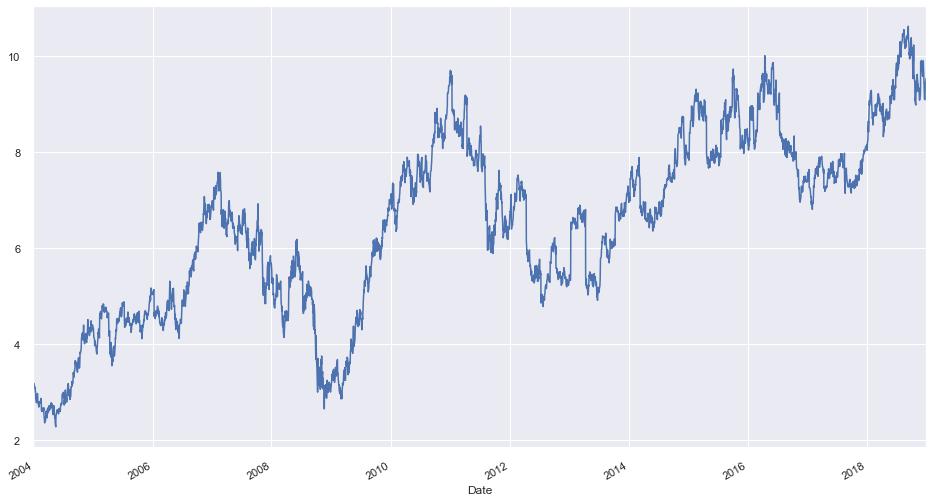

In [27]:
plt.figure(figsize=(16,9))
inf.plot();

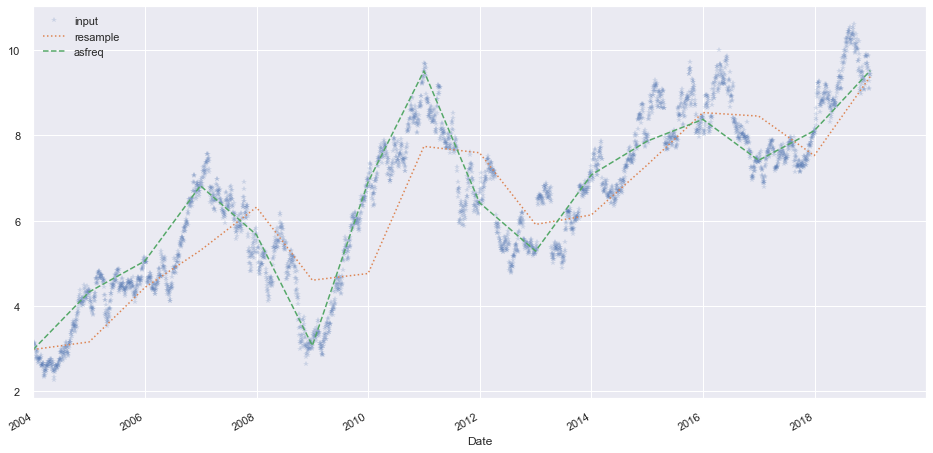

In [28]:
fig=plt.figure(figsize=(16,8))
inf.plot(alpha=0.2,style='*')
inf.resample('BA').mean().plot(style=':')  # BA-  B year end
inf.asfreq('BA').plot(style='--');
plt.legend(['input','resample','asfreq'],
          loc='upper left');

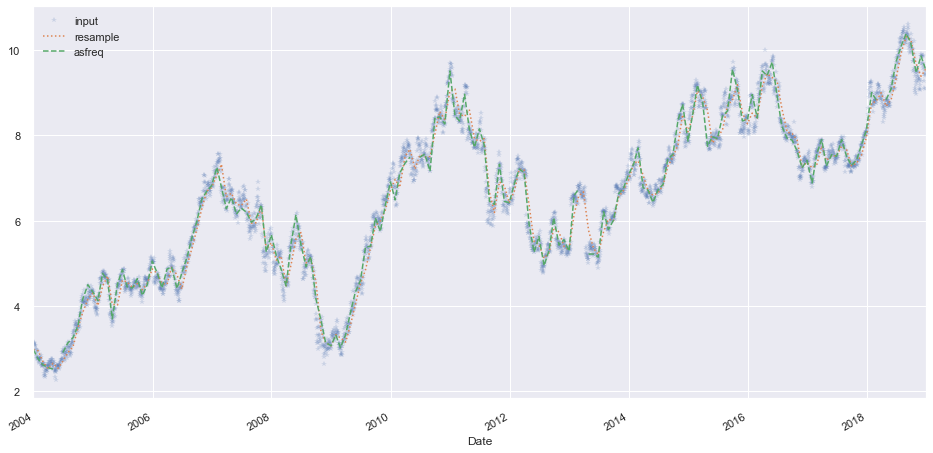

In [29]:
fig=plt.figure(figsize=(16,8))
inf.plot(alpha=0.2,style='*')
inf.resample('BM').mean().plot(style=':')  # BM-  B Month
inf.asfreq('BM').plot(style='--');
plt.legend(['input','resample','asfreq'],
          loc='upper left');

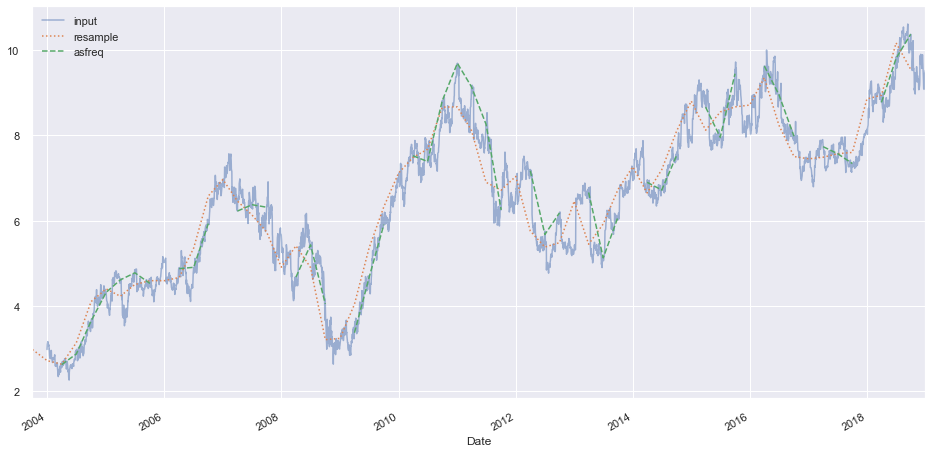

In [30]:
fig=plt.figure(figsize=(16,8))
inf.plot(alpha=0.5,style='-')
inf.resample('BQS').mean().plot(style=':')  # BQS-  B quarter year end
inf.asfreq('BQS').plot(style='--');
plt.legend(['input','resample','asfreq'],
          loc='upper left');

<Figure size 1152x576 with 0 Axes>

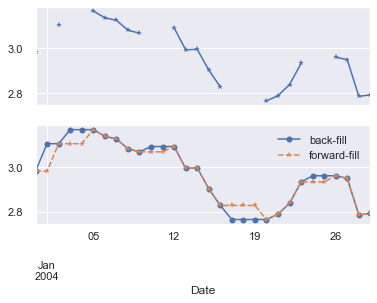

In [32]:
fig=plt.figure(figsize=(16,8))
fig,ax=plt.subplots(2,sharex=True)
data=inf.iloc[0:20]

#Missing Data
data.asfreq('D').plot(ax=ax[0],marker='*')
data.asfreq('D',method='bfill').plot(ax=ax[1],style='-o')
data.asfreq('D',method='ffill').plot(ax=ax[1],style='--*')
ax[1].legend(["back-fill","forward-fill"]);

<Figure size 1152x576 with 0 Axes>

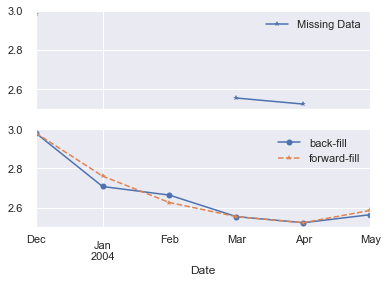

In [33]:
fig=plt.figure(figsize=(16,8))
fig,ax=plt.subplots(2,sharex=True)
data=inf.iloc[0:120]

#Missing Data
data.asfreq('M').plot(ax=ax[0],marker='*')
ax[0].legend(["Missing Data"])

data.asfreq('M',method='bfill').plot(ax=ax[1],style='-o')
data.asfreq('M',method='ffill').plot(ax=ax[1],style='--*')
ax[1].legend(["back-fill","forward-fill"]);

# Tims-Shifts

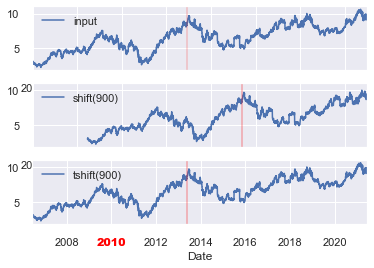

In [37]:
fig,ax=plt.subplots(3,sharey=True)

# apply a frequency to the data
inf=inf.asfreq('D',method='pad')

inf.plot(ax=ax[0])
inf.shift(900).plot(ax=ax[1])
inf.tshift(900).plot(ax=ax[2])

# legends and annotations

local_max=pd.to_datetime('2010-12-05')
offset=pd.Timedelta(900,'D')

ax[0].legend(['input'],loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy',color='red')
ax[0].axvline(local_max,alpha=0.2,color='red')

ax[1].legend(['shift(900)'],loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy',color='red')
ax[1].axvline(local_max+offset,alpha=0.3,color='red')

ax[2].legend(['tshift(900)'],loc=2)
ax[2].get_xticklabels()[2].set(weight='heavy',color='red')
ax[2].axvline(local_max+offset,alpha=0.3,color='red');

In [13]:
inf=inf['Open']

In [14]:
inf

Date
2003-12-31    2.937187
2004-01-02    3.023750
2004-01-05    3.142500
2004-01-06    3.130312
2004-01-07    3.167187
                ...   
2018-12-24    9.190000
2018-12-26    9.150000
2018-12-27    9.300000
2018-12-28    9.480000
2018-12-31    9.470000
Name: Open, Length: 3776, dtype: float64

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;
seaborn.set()

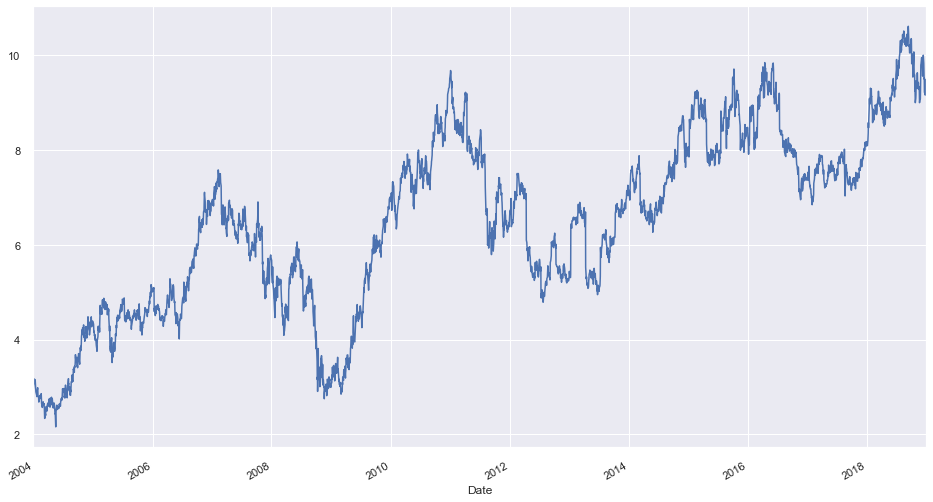

In [16]:
plt.figure(figsize=(16,9))
inf.plot();

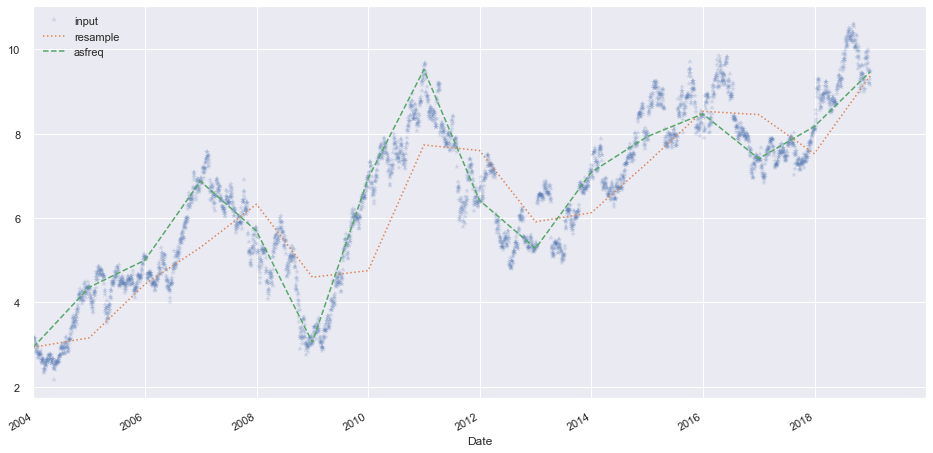

In [17]:
fig=plt.figure(figsize=(16,8))
inf.plot(alpha=0.2,style='*')
inf.resample('BA').mean().plot(style=':')  # BA-  B year end
inf.asfreq('BA').plot(style='--');
plt.legend(['input','resample','asfreq'],
          loc='upper left');

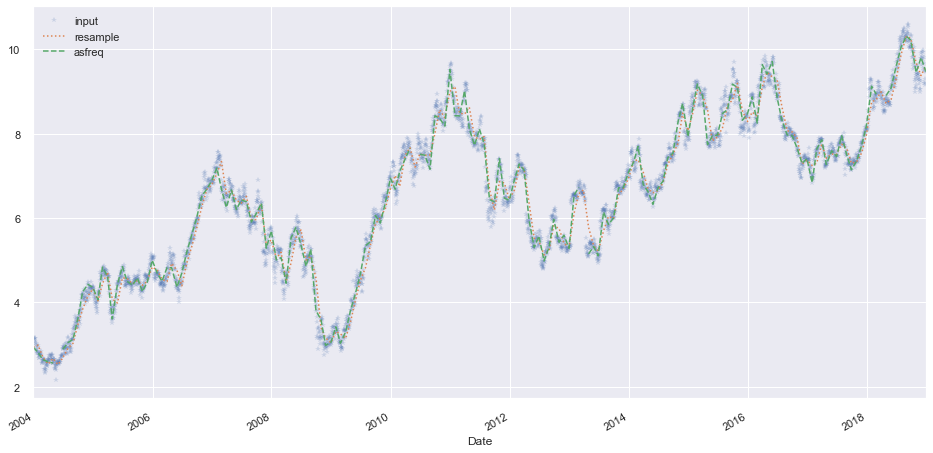

In [18]:
fig=plt.figure(figsize=(16,8))
inf.plot(alpha=0.2,style='*')
inf.resample('BM').mean().plot(style=':')  # BM-  B Month
inf.asfreq('BM').plot(style='--');
plt.legend(['input','resample','asfreq'],
          loc='upper left');

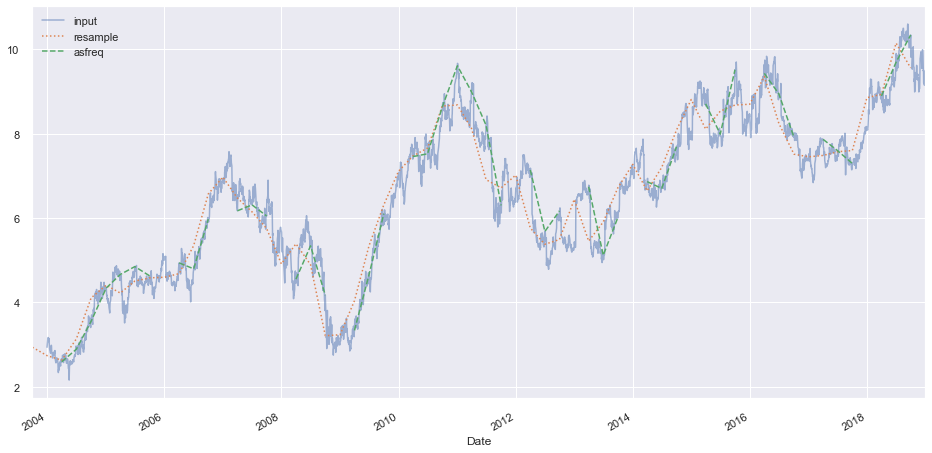

In [19]:
fig=plt.figure(figsize=(16,8))
inf.plot(alpha=0.5,style='-')
inf.resample('BQS').mean().plot(style=':')  # BQS-  B quarter year end
inf.asfreq('BQS').plot(style='--');
plt.legend(['input','resample','asfreq'],
          loc='upper left');

<Figure size 1152x576 with 0 Axes>

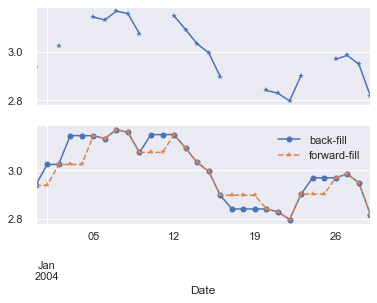

In [20]:
fig=plt.figure(figsize=(16,8))
fig,ax=plt.subplots(2,sharex=True)
data=inf.iloc[0:20]

#Missing Data
data.asfreq('D').plot(ax=ax[0],marker='*')
data.asfreq('D',method='bfill').plot(ax=ax[1],style='-o')
data.asfreq('D',method='ffill').plot(ax=ax[1],style='--*')
ax[1].legend(["back-fill","forward-fill"]);

<Figure size 1152x576 with 0 Axes>

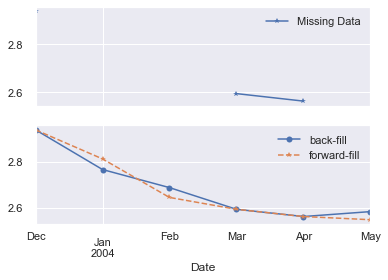

In [21]:
fig=plt.figure(figsize=(16,8))
fig,ax=plt.subplots(2,sharex=True)
data=inf.iloc[0:120]

#Missing Data
data.asfreq('M').plot(ax=ax[0],marker='*')
ax[0].legend(["Missing Data"])

data.asfreq('M',method='bfill').plot(ax=ax[1],style='-o')
data.asfreq('M',method='ffill').plot(ax=ax[1],style='--*')
ax[1].legend(["back-fill","forward-fill"]);

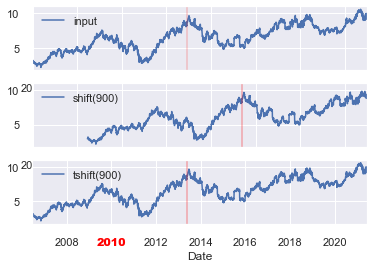

In [22]:
fig,ax=plt.subplots(3,sharey=True)

# apply a frequency to the data
inf=inf.asfreq('D',method='pad')

inf.plot(ax=ax[0])
inf.shift(900).plot(ax=ax[1])
inf.tshift(900).plot(ax=ax[2])

# legends and annotations

local_max=pd.to_datetime('2010-12-05')
offset=pd.Timedelta(900,'D')

ax[0].legend(['input'],loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy',color='red')
ax[0].axvline(local_max,alpha=0.2,color='red')

ax[1].legend(['shift(900)'],loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy',color='red')
ax[1].axvline(local_max+offset,alpha=0.3,color='red')

ax[2].legend(['tshift(900)'],loc=2)
ax[2].get_xticklabels()[2].set(weight='heavy',color='red')
ax[2].axvline(local_max+offset,alpha=0.3,color='red');

Text(0, 0.5, '% Return on Investment')

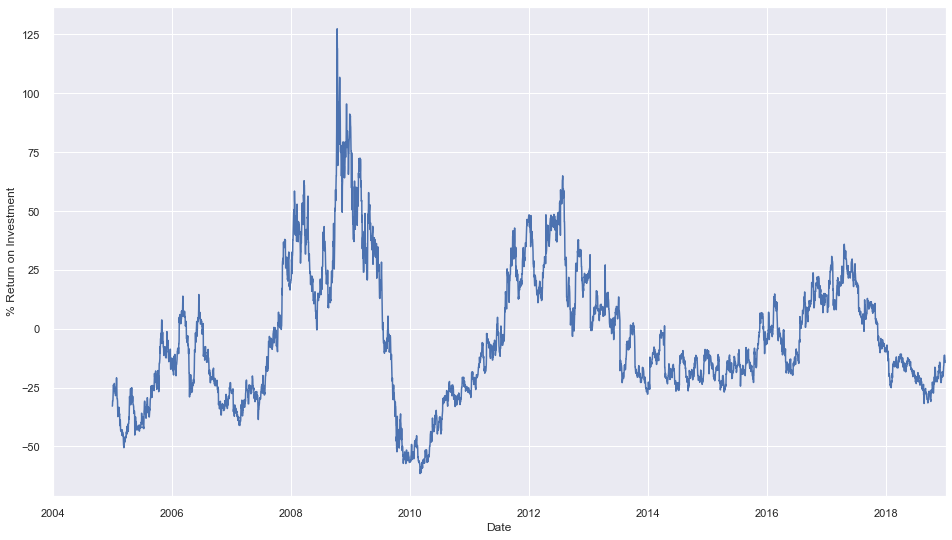

In [23]:
fig=plt.figure(figsize=(16,9))
ROI=100*(inf.shift(365)/inf-1)
ROI.plot()
plt.ylabel('% Return on Investment')

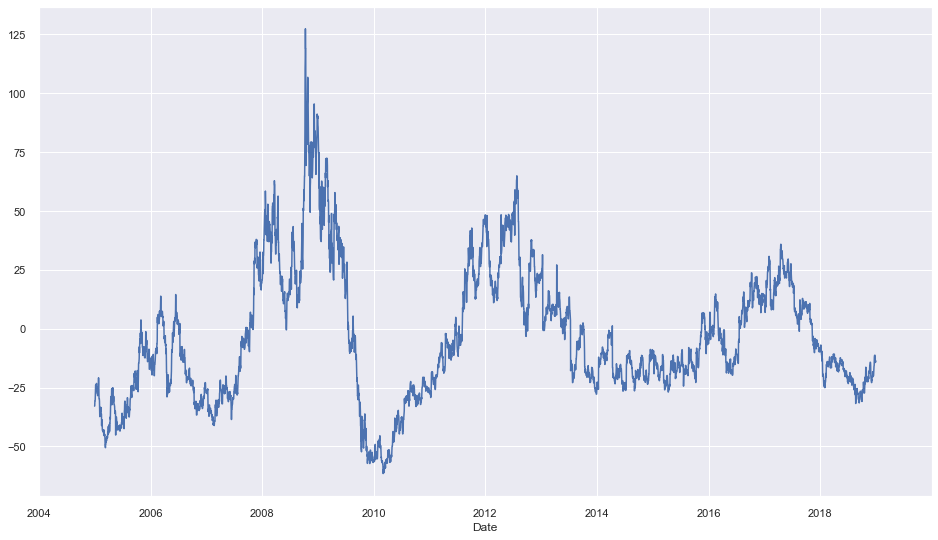

In [26]:
fig=plt.figure(figsize=(16,9))
ROI=100*(inf.tshift(365)/inf-1)
ROI.plot()

# Rolling Windows

AttributeError: 'AxesSubplot' object has no attribute 'line'

<Figure size 1152x576 with 0 Axes>

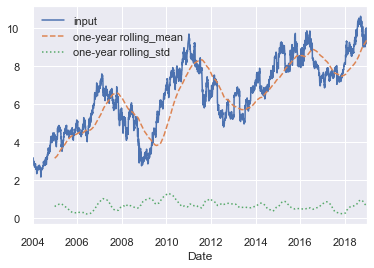

In [27]:
plt.figure(figsize=(16,8))
rolling=inf.rolling(365,center=False)

data=pd.DataFrame({'input':inf,
                  'one-year rolling_mean':rolling.mean(),
                  'one-year rolling_std':rolling.std()
                  })
ax=data.plot(style=['-','--',':'])
ax.line[0].set_alpha(0.5)